#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

#Merging Datasets

In [4]:
merged_df = transactions.merge(customers, on='CustomerID', how='left')  # Merge with Customers
merged_df = merged_df.merge(products, on='ProductID', how='left')
merged_df = merged_df.drop_duplicates()

In [ ]:
print(merged_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

#Distribution of Transactional value

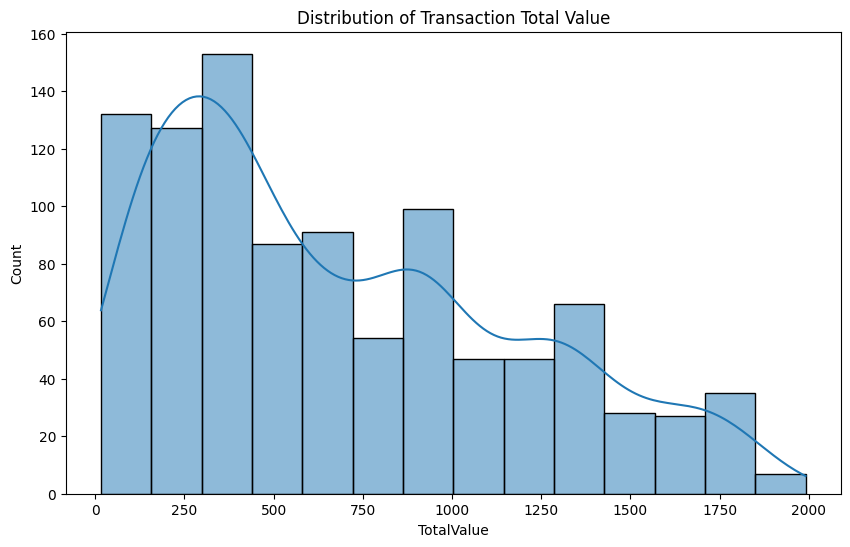

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['TotalValue'], kde=True)
plt.title('Distribution of Transaction Total Value')
plt.show()

# Boxplot of Transactional Total Value

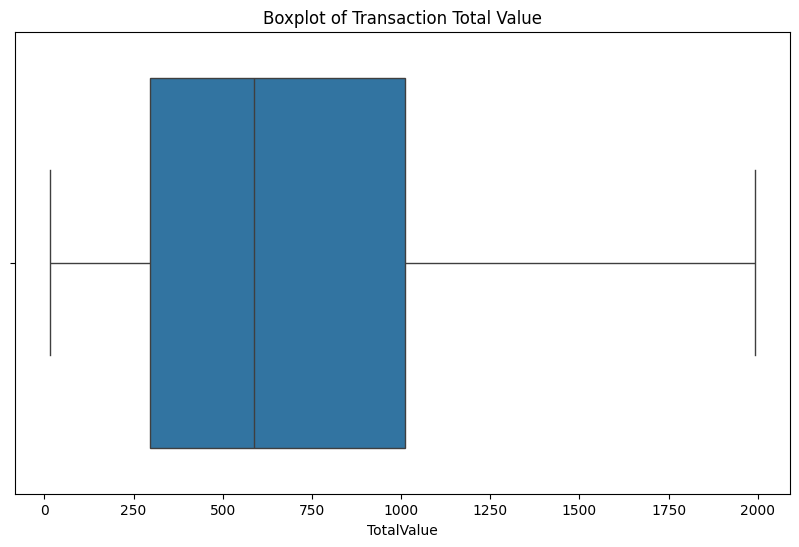

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['TotalValue'])
plt.title('Boxplot of Transaction Total Value')
plt.show()

# Top Customers

In [31]:
top_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(top_customers.head(5))

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


# Regional sales

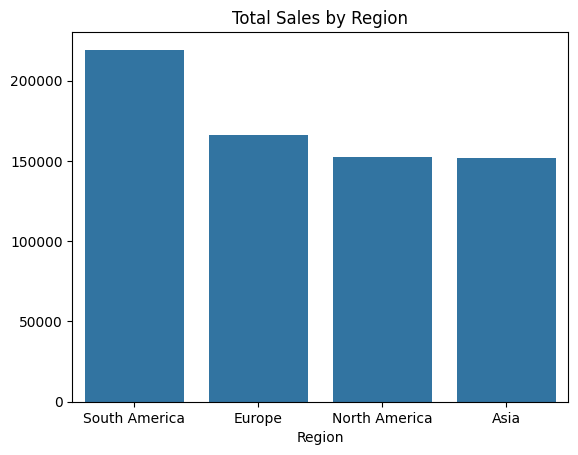

In [8]:
regional_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title('Total Sales by Region')
plt.show()

# Top Products

In [30]:
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print(top_products.head(5))

ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


# Total transactions happened in month

YMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


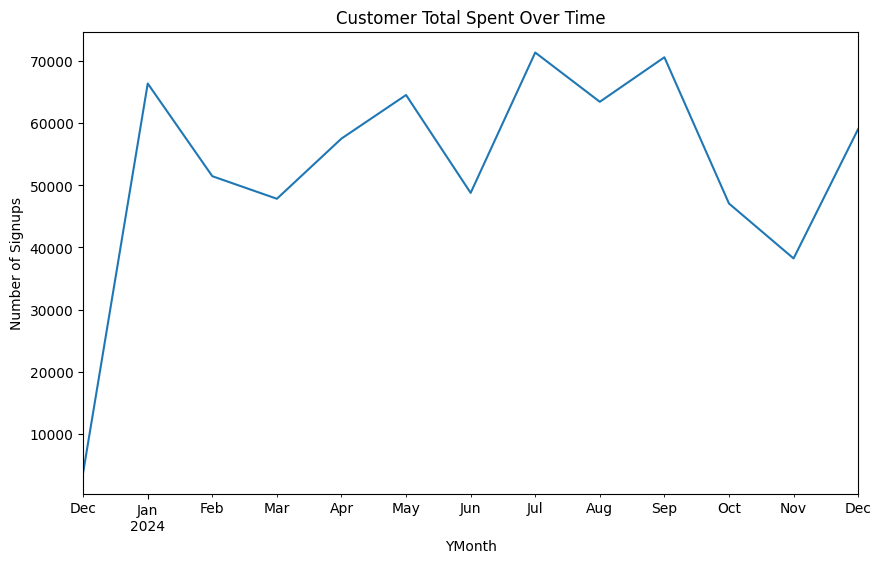

In [18]:
monthly_transactions_value = merged_df.groupby('YMonth')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
t.plot(kind='line')
plt.title('Customer Total Spent Over Time')
plt.ylabel('Number of Signups')
plt.show()

# New Signups happened in months

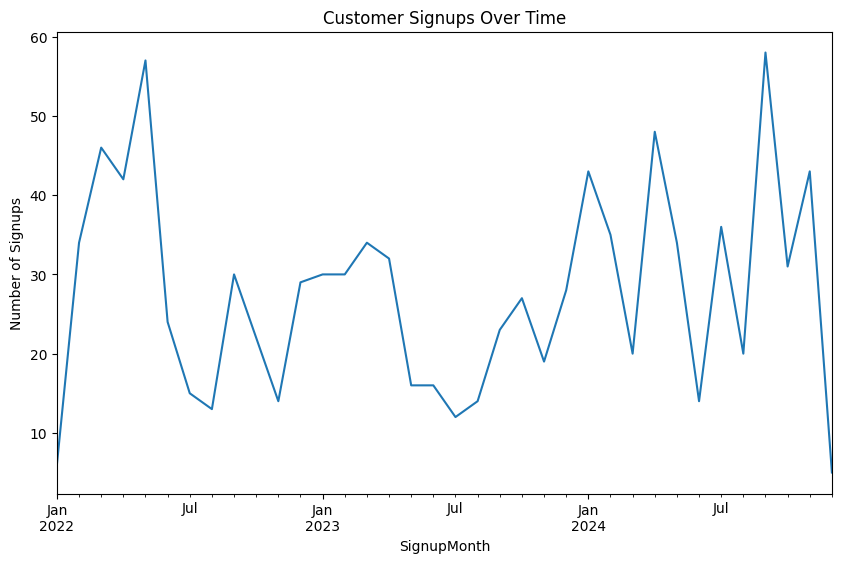

In [ ]:
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'])
merged_df['SignupMonth'] = merged_df['SignupDate'].dt.to_period('M')
signup_trend = merged_df.groupby('SignupMonth').size()

plt.figure(figsize=(10, 6))
signup_trend.plot(kind='line')
plt.title('Customer Signups Over Time')
plt.ylabel('Number of Signups')
plt.show()

In [19]:
print(merged_df)

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   
999        T00992      C0024      P037 2024-04-21 10:52:24         1   

     TotalValue  Price_x          CustomerName         Region  SignupDate  \
0        300.68   300.68        Andrea Jenkins         Eur

# Products in demand during different Months

In [28]:
prod = merged_df.groupby(['ProductName','YMonth'])['Quantity'].sum()
prod = pd.DataFrame(prod)
print(prod)

                              Quantity
ProductName          YMonth           
ActiveWear Biography 2024-01         2
                     2024-05         5
                     2024-06         2
                     2024-08         4
                     2024-09         4
...                                ...
TechPro Vase         2024-08         4
                     2024-09         7
                     2024-10         2
                     2024-11         5
                     2024-12         6

[538 rows x 1 columns]
